# Hyperfine Structure: Rabi Oscillations No Decay

Rb87 5s_{1/2}_F1 -> 5p_{1/2}_F1

## Define the Hyperfine Structure

In [1]:
import numpy as np

In [2]:
from maxwellbloch import hyperfine

Rb87_5s12_F1 = hyperfine.LevelF(I=1.5, J=0.5, F=1)
Rb87_5s12_F2 = hyperfine.LevelF(I=1.5, J=0.5, F=2) # Needed for decay

Rb87_5p12_F1 = hyperfine.LevelF(I=1.5, J=0.5, F=1)

atom1e = hyperfine.Atom1e(element='Rb', isotope='87')

atom1e.add_F_level(Rb87_5s12_F1)
atom1e.add_F_level(Rb87_5s12_F2)
atom1e.add_F_level(Rb87_5p12_F1)

In [3]:
NUM_STATES = atom1e.get_num_mF_levels()
print(NUM_STATES)

11


In [4]:
ENERGIES = atom1e.get_energies()
print(ENERGIES)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [5]:
# Tune to be on resonance with the F1 -> F1 transition
DETUNING = 0.#E_p12_F1 - E_s12_F1
print(DETUNING)

0.0


In [6]:
FIELD_CHANNELS = atom1e.get_coupled_levels(F_level_idxs_a=(0,), F_level_idxs_b=(2,))
print(FIELD_CHANNELS)

[[0, 8], [0, 9], [0, 10], [1, 8], [1, 9], [1, 10], [2, 8], [2, 9], [2, 10]]


In [7]:
q = 1 # Field polarisation
FIELD_FACTORS = atom1e.get_clebsch_hf_factors(F_level_idxs_a=(0,), F_level_idxs_b=(2,), q=q)
print(FIELD_FACTORS)

[ 0.          0.          0.          0.28867513 -0.         -0.
  0.          0.28867513  0.        ]


In [8]:
strength_factor = FIELD_FACTORS[3]
print(strength_factor)

0.2886751345948128


In [9]:
DECAY_CHANNELS = atom1e.get_coupled_levels(F_level_idxs_a=(0,1), F_level_idxs_b=(2,))
print(DECAY_CHANNELS)

[[0, 8], [0, 9], [0, 10], [1, 8], [1, 9], [1, 10], [2, 8], [2, 9], [2, 10], [3, 8], [3, 9], [3, 10], [4, 8], [4, 9], [4, 10], [5, 8], [5, 9], [5, 10], [6, 8], [6, 9], [6, 10], [7, 8], [7, 9], [7, 10]]


In [10]:
DECAY_FACTORS = atom1e.get_decay_factors(F_level_idxs_a=(0, 1), F_level_idxs_b=(2,))
print(DECAY_FACTORS)

[ 0.28867513 -0.28867513  0.          0.28867513 -0.         -0.28867513
  0.          0.28867513 -0.28867513  0.70710678  0.          0.
  0.5         0.5        -0.          0.28867513  0.57735027  0.28867513
 -0.          0.5         0.5         0.          0.          0.70710678]


In [11]:
INITIAL_STATE = (
    [1.0/3.0]*3 + # s12_F1
    [0.0/5.0]*5 + # s12_F2
    [0.0]*3) # p12_F1    
print(INITIAL_STATE)

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [12]:
sech_fwhm_conv = 1./2.6339157938
WIDTH = 1.0*sech_fwhm_conv # [τ]
print('WIDTH', WIDTH)

n = 2.0 # For a pulse area of nπ    
AMPL = n/WIDTH/(2*np.pi) # Pulse amplitude [2π Γ]

mult = 1/strength_factor
print('mult', mult)

AMPL *= mult

print('ampl', AMPL)

WIDTH 0.3796628587572578
mult 3.4641016151377553
ampl 2.9043077704595337


In [13]:
ob_solve_json = """
{{
  "atom": {{
    "decays": [
      {{
        "channels": {decay_channels},
        "rate": 0.0,
        "factors": {decay_factors}
      }}
    ],
    "energies": {energies},
    "fields": [
      {{
        "coupled_levels": {field_channels},
        "factors": {field_factors},
        "detuning": {detuning},
        "detuning_positive": true,
        "label": "probe",
        "rabi_freq": 1.0,
        "rabi_freq_t_args": {{
          "ampl": {ampl},
          "centre": 0.0,
          "width": {width}
        }},
        "rabi_freq_t_func": "sech"
      }}
    ],
    "num_states": {num_states},
    "initial_state": {initial_state}
  }},
  "t_min": -2.0,
  "t_max": 5.0,
  "t_steps": 100,
  "method": "mesolve",
  "opts": {{
    "method": "bdf", 
    "atol": 1e-5, 
    "rtol": 1e-3,
    "nsteps": 1e4
  }},
  "savefile": ""
}}
""".format(num_states=NUM_STATES, energies=ENERGIES, initial_state=INITIAL_STATE, detuning=DETUNING, 
    field_channels=FIELD_CHANNELS, field_factors=list(FIELD_FACTORS), decay_channels=DECAY_CHANNELS, 
    decay_factors=list(DECAY_FACTORS), ampl=AMPL, width=WIDTH)

In [14]:
from maxwellbloch import ob_solve

obs = ob_solve.OBSolve().from_json_str(ob_solve_json)

In [15]:
obs.solve(show_pbar=True, recalc=True);

10.9%. Run time:   0.00s. Est. time left: 00:00:00:00
20.8%. Run time:   0.01s. Est. time left: 00:00:00:00
30.7%. Run time:   0.01s. Est. time left: 00:00:00:00
40.6%. Run time:   0.02s. Est. time left: 00:00:00:00
50.5%. Run time:   0.02s. Est. time left: 00:00:00:00
60.4%. Run time:   0.03s. Est. time left: 00:00:00:00
70.3%. Run time:   0.03s. Est. time left: 00:00:00:00
80.2%. Run time:   0.03s. Est. time left: 00:00:00:00
90.1%. Run time:   0.04s. Est. time left: 00:00:00:00
Total run time:   0.04s


In [16]:
pop_0 = np.absolute(obs.states_t()[:,0,0])
pop_1 = np.absolute(obs.states_t()[:,1,1])
pop_2 = np.absolute(obs.states_t()[:,2,2])
pop_3 = np.absolute(obs.states_t()[:,3,3])
pop_4 = np.absolute(obs.states_t()[:,4,4])
pop_5 = np.absolute(obs.states_t()[:,5,5])
pop_6 = np.absolute(obs.states_t()[:,6,6])
pop_7 = np.absolute(obs.states_t()[:,7,7])
pop_8 = np.absolute(obs.states_t()[:,8,8])
pop_9 = np.absolute(obs.states_t()[:,9,9])
pop_10 = np.absolute(obs.states_t()[:,10,10])
# pop_11 = np.absolute(obs.states_t()[:,11,11])
# pop_12 = np.absolute(obs.states_t()[:,12,12])
# pop_13 = np.absolute(obs.states_t()[:,13,13])
# pop_14 = np.absolute(obs.states_t()[:,14,14])
# pop_15 = np.absolute(obs.states_t()[:,15,15])

In [17]:
pop_s12_F1 = pop_0 + pop_1 + pop_2
pop_s12_F2 = pop_3 + pop_4 + pop_5 + pop_6 + pop_7
pop_p12_F1 = pop_8 + pop_9 + pop_10

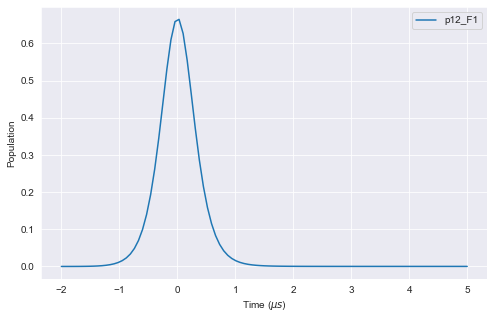

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

import numpy as np

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
# ax.plot(obs.tlist, pop_s12, label='Ground state')
# ax.plot(obs.tlist, pop_s12_F1, label='s12_F1')
# ax.plot(obs.tlist, pop_s12_F2, label='s12_F2')
ax.plot(obs.tlist, pop_p12_F1, label='p12_F1')
ax.set_xlabel(r'Time ($\mu s$)')
ax.set_ylabel(r'Population')
# ax.set_ylim([0.,1])
leg = ax.legend(frameon=True)

# plt.savefig('images/ob-solve-two-rabi-oscillations.png')

In [19]:
pop_p12_F1

array([0.00000000e+00, 4.51451949e-06, 1.75987682e-05, 4.48704940e-05,
       9.44838978e-05, 1.78493256e-04, 3.10987503e-04, 5.17375917e-04,
       8.35961134e-04, 1.32130822e-03, 2.04943909e-03, 3.13357899e-03,
       4.73961903e-03, 7.10590319e-03, 1.05730273e-02, 1.56219586e-02,
       2.29332938e-02, 3.34568361e-02, 4.84851453e-02, 6.97204915e-02,
       9.92975758e-02, 1.39682972e-01, 1.93319052e-01, 2.61838398e-01,
       3.44721793e-01, 4.37553669e-01, 5.30646186e-01, 6.09588053e-01,
       6.58388736e-01, 6.64494165e-01, 6.26481789e-01, 5.54538033e-01,
       4.64401620e-01, 3.71303590e-01, 2.86323170e-01, 2.15035872e-01,
       1.58569622e-01, 1.15334836e-01, 8.30188197e-02, 5.93020358e-02,
       4.21952261e-02, 3.00069849e-02, 2.13798741e-02, 1.52806262e-02,
       1.09608966e-02, 7.89572712e-03, 5.71920523e-03, 4.17702894e-03,
       3.08322709e-03, 2.30162400e-03, 1.73778183e-03, 1.32886528e-03,
       1.03173575e-03, 8.14777943e-04, 6.54665761e-04, 5.35002798e-04,
      